In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from flygym.envs.nmf_mujoco import MuJoCoParameters
from flygym.arena.mujoco_arena import FlatTerrain
import flygym.util.vision as vision
from odor_vision import ObstacleOdorArena, NMFAvoidObstacle

In [2]:
arena = ObstacleOdorArena()
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True, enable_olfaction=True)
# sim_params = MuJoCoParameters(render_playspeed=0.2, render_raw_vision=True)
sim = NMFAvoidObstacle(
    sim_params=sim_params,
    arena=arena,
    decision_dt=0.05,
    n_stabilisation_steps=5000,
    obj_threshold=50,
)

In [3]:
actions = [x for a in range(-10,10,2) for x in [[1-a/10, -1+a/10],[-1+a/10, 1-a/10]]]
print(len(actions))

20


In [4]:
obs_hist = []
visual_hist = []

se = []

for i in trange(20):
    if i>12:
        act = [0,1]
    else:
        act = [1,0]
    obs, rew, term, trunc, info = sim.step(np.array(act))
    sim.render()
    obs_hist.append(obs)
    visual_hist.append(sim.curr_raw_visual_input)
obs_hist = np.array(obs_hist)
sim.save_video("test_obs.mp4")

100%|██████████| 20/20 [01:35<00:00,  4.80s/it]


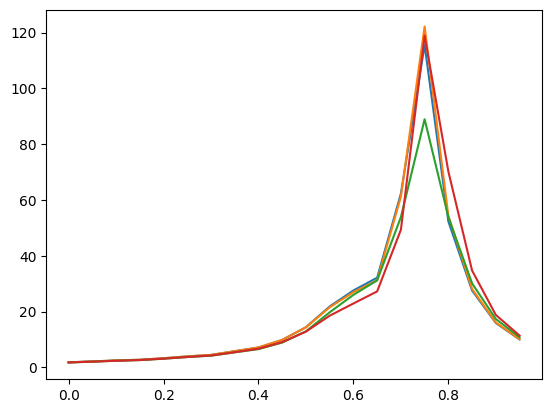

In [5]:
time = 0.05*np.arange(obs_hist.shape[0])
plt.plot(time,obs_hist[:, 0], label="x_left")
plt.plot(time,obs_hist[:, 1], label="x_right")
plt.plot(time,obs_hist[:, 2], label="size_left")
plt.plot(time,obs_hist[:, 3], label="size_right")
#plt.legend()

In [6]:
readouts_per_eye = vision.raw_image_to_hex_pxls(
    np.ascontiguousarray(sim.curr_raw_visual_input[0]), vision.num_pixels_per_ommatidia, vision.ommatidia_id_map
)

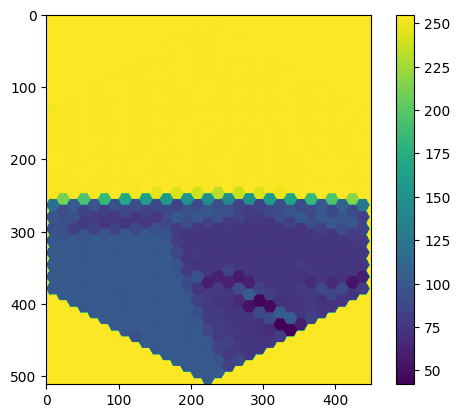

In [7]:
hr = vision.hex_pxls_to_human_readable(readouts_per_eye, vision.ommatidia_id_map)
plt.imshow(hr)
plt.colorbar()

In [8]:
visual_hist = np.array(visual_hist)
print(visual_hist.shape)

(20, 2, 512, 450, 3)


  0%|          | 0/20 [00:00<?, ?it/s]

 40%|████      | 8/20 [00:00<00:00, 48.49it/s]

(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)


100%|██████████| 20/20 [00:00<00:00, 52.75it/s]

(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)


20


 45%|████▌     | 9/20 [00:00<00:00, 85.47it/s]

(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)


100%|██████████| 20/20 [00:00<00:00, 60.85it/s]

(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)
(721, 2)


20


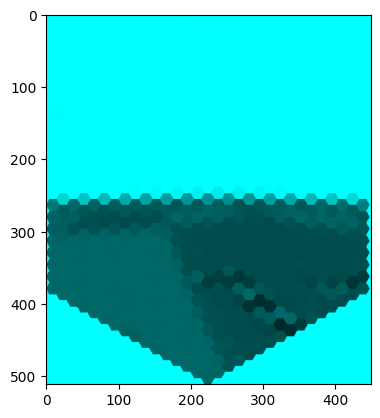

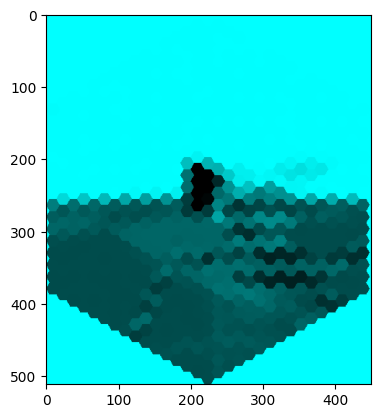

In [17]:
import matplotlib.animation as animation
for j in [0,1]:
    frames = []

    fig, ax = plt.subplots()
    for i in trange(0,len(visual_hist)):
        readouts_per_eye = vision.raw_image_to_hex_pxls(
            np.ascontiguousarray(visual_hist[i,j]), vision.num_pixels_per_ommatidia, vision.ommatidia_id_map
        )
        right_eye = readouts_per_eye

        imR = vision.hex_pxls_to_human_readable(right_eye, vision.ommatidia_id_map)       ###

        imR_rgb = np.zeros((imR.shape[0], imR.shape[1], 3), dtype=int)
        imR_rgb[:,:,2] = imR.copy()
        imR_rgb[:,:,1] = imR.copy()

        f = ax.imshow(imR_rgb, animated=True)
        frames.append([f])

    ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                    repeat_delay=1000)
    ani.save(f'eyes{j}.mp4')
    print(len(frames))


In [ ]:
sim._last_render_time

1.247899999999879

In [ ]:
sim.curr_time

1.2499999999998788

In [ ]:
sim._eff_render_interval

0.0033333333333333335

In [ ]:
sim.physics.named

NamedIndexStructs(model=<dm_control.mujoco.index.make_struct_indexer.<locals>.StructIndexer object at 0x7f8a730940e0>, data=<dm_control.mujoco.index.make_struct_indexer.<locals>.StructIndexer object at 0x7f8a75a4b360>)